https://www.youtube.com/watch?v=NQQ3DRdXAXEm

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns

import re

sns.set_style('whitegrid')
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, StackingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import lightgbm as lgb

In [2]:
#import relevant packages 
import pandas as pd 
import numpy as np 
import plotly.graph_objects as go
import plotly.express as px
import scipy.stats as stats
from IPython.display import display, HTML

In [3]:
from imblearn.over_sampling import SMOTE

In [4]:
df_train = pd.read_csv("data/competition/train.csv")
df_test = pd.read_csv("data/competition/test.csv")
df_combine = pd.concat([df_train, df_test])#, axis = 1)

In [5]:
df_combine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

In [6]:
df_combine.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2919.0,1460.000000,842.787043,1.0,730.5,1460.0,2189.5,2919.0
MSSubClass,2919.0,57.137718,42.517628,20.0,20.0,50.0,70.0,190.0
LotFrontage,2433.0,69.305795,23.344905,21.0,59.0,68.0,80.0,313.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
OverallQual,2919.0,6.089072,1.409947,1.0,5.0,6.0,7.0,10.0
OverallCond,2919.0,5.564577,1.113131,1.0,5.0,5.0,6.0,9.0
YearBuilt,2919.0,1971.312778,30.291442,1872.0,1953.5,1973.0,2001.0,2010.0
YearRemodAdd,2919.0,1984.264474,20.894344,1950.0,1965.0,1993.0,2004.0,2010.0
MasVnrArea,2896.0,102.201312,179.334253,0.0,0.0,0.0,164.0,1600.0
BsmtFinSF1,2918.0,441.423235,455.610826,0.0,0.0,368.5,733.0,5644.0


In [7]:
# Calculates the total number of values per column
total_values = len(df_combine)

# Calculates the count of null values in each column
null_count = df_combine.isnull().sum()

# Calculates the percentage of null values in each column
null_percentage = (null_count / total_values) * 100

# Filters and displays only the columns with any missing value (percentage different from zero)
filtered_null_percentage = null_percentage[null_percentage > 0]
filtered_null_percentage.round(2)

MSZoning         0.14
LotFrontage     16.65
Alley           93.22
Utilities        0.07
Exterior1st      0.03
Exterior2nd      0.03
MasVnrType      60.50
MasVnrArea       0.79
BsmtQual         2.77
BsmtCond         2.81
BsmtExposure     2.81
BsmtFinType1     2.71
BsmtFinSF1       0.03
BsmtFinType2     2.74
BsmtFinSF2       0.03
BsmtUnfSF        0.03
TotalBsmtSF      0.03
Electrical       0.03
BsmtFullBath     0.07
BsmtHalfBath     0.07
KitchenQual      0.03
Functional       0.07
FireplaceQu     48.65
GarageType       5.38
GarageYrBlt      5.45
GarageFinish     5.45
GarageCars       0.03
GarageArea       0.03
GarageQual       5.45
GarageCond       5.45
PoolQC          99.66
Fence           80.44
MiscFeature     96.40
SaleType         0.03
SalePrice       49.98
dtype: float64

In [8]:
filtered_null_percentage = null_percentage[null_percentage > 40]
filtered_null_percentage.round(2), filtered_null_percentage.index.tolist()

(Alley          93.22
 MasVnrType     60.50
 FireplaceQu    48.65
 PoolQC         99.66
 Fence          80.44
 MiscFeature    96.40
 SalePrice      49.98
 dtype: float64,
 ['Alley',
  'MasVnrType',
  'FireplaceQu',
  'PoolQC',
  'Fence',
  'MiscFeature',
  'SalePrice'])

In [9]:
# Select numeric columns
numeric_columns = df_combine.select_dtypes(include=['int', 'float'])

# List of numeric columns
numeric_column_names = numeric_columns.columns.tolist()

# List of non-numeric columns
non_numeric_column_names = [col for col in df_combine.columns if col not in numeric_column_names]

# print("Numeric columns:", numeric_column_names)
# print("Non-numeric columns:", non_numeric_column_names)

In [10]:
# filtered_values = null_percentage[(null_percentage > 0) & (null_percentage < 40)]
# filtered_values

In [11]:
import plotly.graph_objects as go

# Select only numeric columns
df_numeric = df_combine[numeric_column_names]

# Remove specific columns if needed
df_numeric = df_numeric.drop(['Id', 'SalePrice'], axis=1, errors='ignore')

# Create the boxplot using go.Box with the DataFrame directly
fig = go.Figure(data=[go.Box(y=df_numeric[col], name=col) for col in df_numeric.columns])

# Update layout
fig.update_layout(title='Boxplot of Numeric Variables',
                  xaxis_title='Variables',
                  yaxis_title='Values',
                  autosize=True,  # Set the figure size to the maximum screen size
                  margin=dict(l=0, r=0, t=40, b=0))  # Set the margins

# Show the plot
fig.show()

In [12]:
def plot_histogram(df):
    # Create a histogram of the SalePrice column
    mu, sigma = stats.norm.fit(df)
    plt.figure(figsize=(10, 6))
    sns.histplot(df, bins=20, kde=True, stat='density', alpha=0.75, label="Histogram")
    
    # Plot the fitted normal distribution
    x_norm = np.linspace(df.min(), df.max(), 100)
    y_norm = stats.norm.pdf(x_norm, mu, sigma)
    plt.plot(x_norm, y_norm, 'r-', linewidth=2, label=f"Normal dist. (μ={mu:.2f}, σ={sigma:.2f})")

    # Set plot labels and title
    plt.xlabel('SalePrice')
    plt.ylabel('Density')
    plt.title('SalePrice Distribution')
    plt.legend()

    # Show the histogram
    plt.show()
    
def plot_quantile_quantile(df):
    
    # Create a Q-Q plot
    plt.figure(figsize=(10, 6))
    stats.probplot(df, dist="norm", plot=plt)

    # Set plot labels and title
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Ordered Values')
    plt.title('Q-Q plot')
    plt.legend(['Data', 'Fitted Normal Distribution'], loc='best')
    
    # Show the Q-Q plot
    plt.show()
    
def plot_boxplot(data):
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data)
    plt.title('Boxplot')
    plt.xlabel('SalePrice')
    plt.ylabel('Price')
    plt.grid(True)
    plt.show()

In [13]:
df = df_train['SalePrice']

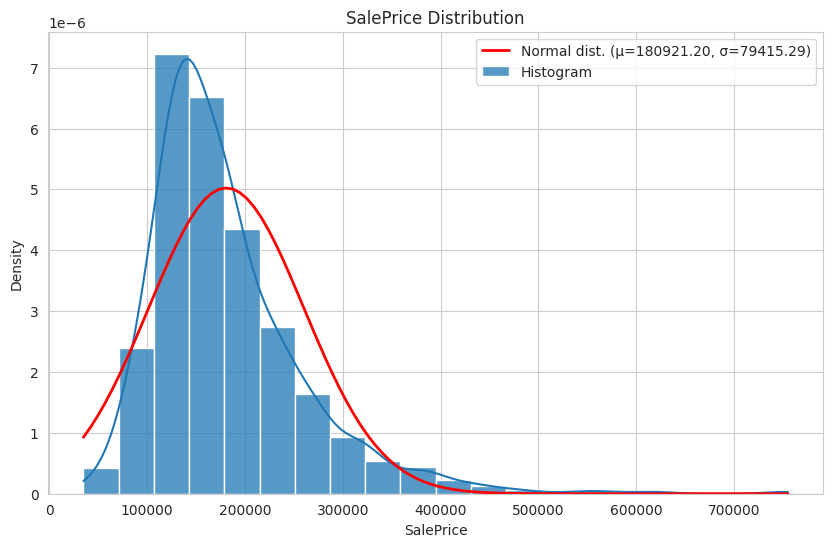

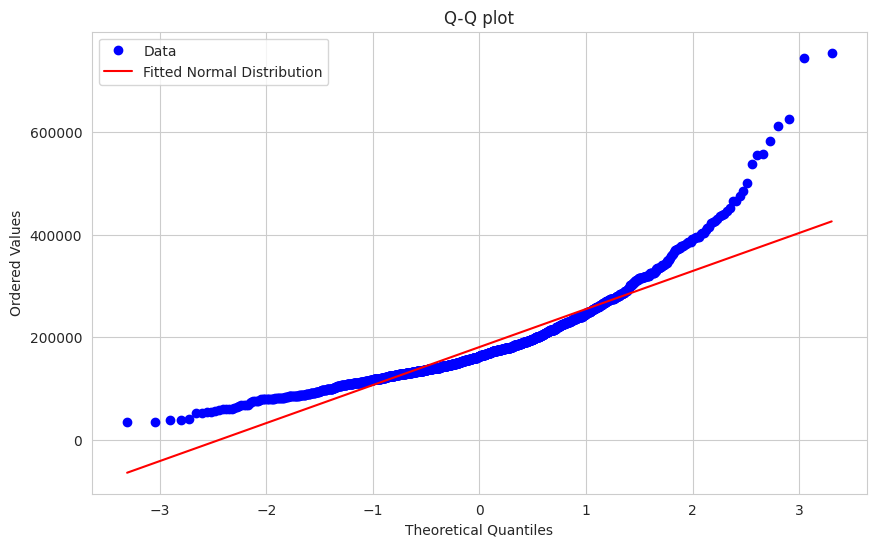

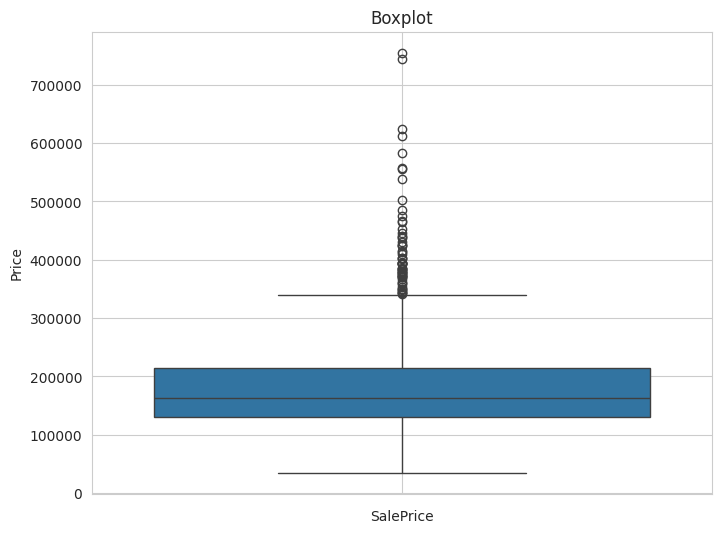

In [14]:
plot_histogram(df)
plot_quantile_quantile(df)
plot_boxplot(df)

- Distribution of dwelling types and their relation to sale prices?
- Does zoning impact sale price?
- Does street and alley access types effect on sale price?
- What is the Average sale price by property shape?
- Is there a Correlation between Property Age and Sale Price
- Is there a Correlation between Living Area and Sale Price
- Does price change year to year?

In [15]:
df = df_train

In [16]:
# 1. Distribution of dwelling types and their relation to sale prices
dwelling_types = df['BldgType'].value_counts()
dwelling_prices = df.groupby('BldgType')['SalePrice'].mean()

# Format labels for the second graph
formatted_dwelling_prices = ['$' + f'{value:,.2f}' for value in dwelling_prices.values]

# Create bar charts
fig1 = go.Figure(data=[go.Bar(
    x=dwelling_types.index,
    y=dwelling_types.values,
    text=dwelling_types.values,
    textposition='outside',
    width=0.4,
    marker=dict(line=dict(width=2, color='rgba(0,0,0,1)'), opacity=1)
)])
fig1.update_layout(
    title='Distribution of Building Types',
    xaxis_title='Building Type',
    yaxis_title='Count',
)

fig2 = go.Figure(data=[go.Bar(
    x=dwelling_prices.index,
    y=dwelling_prices.values,
    textposition='outside',
    width=0.4,
    marker=dict(line=dict(width=2, color='rgba(0,0,0,1)'), opacity=1)
)])
fig2.update_layout(
    title='Average Sale Price by Building Type',
    xaxis_title='Building Type',
    yaxis_title='Price'
)

# Show the figures
fig1.show()
fig2.show()

In [17]:
# 2. Zoning impact on sale price
zoning_prices = df.groupby('MSZoning')['SalePrice'].mean()
fig3 = px.bar(x=zoning_prices.index, y=zoning_prices.values, title='Average Sale Price by Zoning', text=zoning_prices.values)

fig3.update_traces(texttemplate='$%{text:,.0f}', textposition='outside')
fig3.update_yaxes(title='Sale Price', tickprefix='$', tickformat=',')
fig3.update_xaxes(title='Zoning')
fig3.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

fig3.show()

In [18]:
# 3. Street and alley access types effect on sale price
street_prices = df.groupby('Street')['SalePrice'].mean()
alley_prices = df.groupby('Alley')['SalePrice'].mean()

# Street Prices
fig5 = px.bar(x=street_prices.index, y=street_prices.values, title='Average Sale Price by Street Type', text=street_prices.values)

fig5.update_traces(texttemplate='$%{text:,.0f}', textposition='outside')
fig5.update_yaxes(title='Sale Price', tickprefix='$', tickformat=',')
fig5.update_xaxes(title='Street Type')
fig5.update_layout(showlegend=False)

# Alley Prices
colors_alley = np.where(alley_prices.index == 'Pave', 'purple', 'green')
fig6 = px.bar(x=alley_prices.index, y=alley_prices.values, title='Average Sale Price by Alley Type', text=alley_prices.values)

fig6.update_traces(texttemplate='$%{text:,.0f}', textposition='outside')
fig6.update_yaxes(title='Sale Price', tickprefix='$', tickformat=',')
fig6.update_xaxes(title='Alley Type')
fig6.update_layout(showlegend=False)

fig5.show()
fig6.show()

In [19]:
# 4. Average sale price by property shape
colors = px.colors.qualitative.Plotly

shape_prices = df.groupby('LotShape')['SalePrice'].mean()
contour_prices = df.groupby('LandContour')['SalePrice'].mean()
# Shape Prices
fig7 = px.bar(x=shape_prices.index, y=shape_prices.values, title='Average Sale Price by Property Shape', text=shape_prices.values)

fig7.update_traces(marker_color=colors, texttemplate='$%{text:,.0f}', textposition='outside')
fig7.update_yaxes(title='Sale Price', tickprefix='$', tickformat=',')
fig7.update_xaxes(title='Property Shape')
fig7.update_layout(showlegend=False)

# Contour Prices
fig8 = px.bar(x=contour_prices.index, y=contour_prices.values, title='Average Sale Price by Property Contour', text=contour_prices.values)

fig8.update_traces(marker_color=colors, texttemplate='$%{text:,.0f}', textposition='outside')
fig8.update_yaxes(title='Sale Price', tickprefix='$', tickformat=',')
fig8.update_xaxes(title='Property Contour')
fig8.update_layout(showlegend=False)

fig7.show()
fig8.show()

In [20]:
# 5. Calculate Property Age
df['PropertyAge'] = df['YrSold'] - df['YearBuilt']

# Calculate Correlation between Property Age and Sale Price
age_price_corr = df['PropertyAge'].corr(df['SalePrice'])
print(f'Correlation between Property Age and Sale Price: {age_price_corr}')

# Create a scatter plot to visualize the relationship between Property Age and Sale Price
fig9 = px.scatter(df, x='PropertyAge', y='SalePrice', title='Property Age vs Sale Price', color_continuous_scale=px.colors.sequential.Purp)

# fig9.update_layout(plot_bgcolor='rgb(30,30,30)', paper_bgcolor='rgb(30,30,30)', font=dict(color='white'))

fig9.show()

Correlation between Property Age and Sale Price: -0.523350417546816


In [21]:
# 6. Calculate Correlation between Living Area and Sale Price
living_area_price_corr = df['GrLivArea'].corr(df['SalePrice'])
print(f'Correlation between Living Area (above grade) and Sale Price: {living_area_price_corr}')

# Create a scatter plot to visualize the relationship between Living Area and Sale Price
fig10 = px.scatter(df, x='GrLivArea', y='SalePrice', title='Living Area (above grade) vs Sale Price', color_continuous_scale=px.colors.sequential.Purp)

# fig10.update_layout(plot_bgcolor='rgb(30,30,30)', paper_bgcolor='rgb(30,30,30)', font=dict(color='white'))

fig10.show()

Correlation between Living Area (above grade) and Sale Price: 0.7086244776126523


In [22]:
# 7. Box plot of price over the years
yearly_avg_sale_price = df.groupby('YrSold')['SalePrice'].mean()

fig13 = px.box(df, x='YrSold', y='SalePrice', title='Sale Price Trends Over the Years',
               points=False)

fig13.add_trace(px.line(x=yearly_avg_sale_price.index, y=yearly_avg_sale_price.values).data[0])

fig13.update_traces(line=dict(color='red', width=4), selector=dict(type='scatter', mode='lines'))

for year, avg_price in yearly_avg_sale_price.items():
    fig13.add_annotation(
        x=year,
        y=avg_price,
        text=f"{avg_price:,.0f}",
        # font=dict(color='white'),
        # showarrow=False,
        # bgcolor='rgba(128, 0, 128, 0.6)'
    )

fig13.update_layout(
    # plot_bgcolor='rgb(30,30,30)',
    # paper_bgcolor='rgb(30,30,30)',
    # font=dict(color='white'),
    xaxis_title='Year Sold',
    yaxis_title='Sale Price'
)

fig13.show()

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


# Define transformers for numerical and categorical columns
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output = False))
])

In [24]:
# Update categorical and numerical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Remove target variable from numerical columns
numerical_columns = numerical_columns.drop('SalePrice')

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ],remainder = 'passthrough')

# Create a pipeline with the preprocessor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)])

# Apply the pipeline to your dataset
X = df.drop('SalePrice', axis=1)
y = np.log(df['SalePrice']) #normalize dependent variable 
X_preprocessed = pipeline.fit_transform(X)

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Define the models
models = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

# Define the hyperparameter grids for each model
param_grids = {
    'LinearRegression': {},
    'RandomForest': {
        'n_estimators': [100, 200, 500],
        'max_depth': [None, 10, 30],
        'min_samples_split': [2, 5, 10],
    },
    'XGBoost': {
        'n_estimators': [100, 200, 500],
        'learning_rate': [0.01, 0.1, 0.3],
        'max_depth': [3, 6, 10],
    }
}

# 3-fold cross-validation
cv = KFold(n_splits=3, shuffle=True, random_state=42)

# Train and tune the models
grids = {}
for model_name, model in models.items():
    #print(f'Training and tuning {model_name}...')
    grids[model_name] = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=cv, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
    grids[model_name].fit(X_train, y_train)
    best_params = grids[model_name].best_params_
    best_score = np.sqrt(-1 * grids[model_name].best_score_)
    
    print(f'Best parameters for {model_name}: {best_params}')
    print(f'Best RMSE for {model_name}: {best_score}\n')

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
Best parameters for LinearRegression: {}
Best RMSE for LinearRegression: 20697450286.620155

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   2.3s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   2.3s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   2.4s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   2.9s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   3.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   2.9s
[CV] END max_depth=None, min_samples_split=5, n_estimators=200; total time=   4.8s
[CV] END max_depth=Non

In [26]:
from sklearn.neural_network import MLPRegressor

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Create an MLPRegressor instance
mlp = MLPRegressor(random_state=42,max_iter=10000, n_iter_no_change = 3,learning_rate_init=0.001)

# Define the parameter grid for tuning
param_grid = {
    'hidden_layer_sizes': [(10,), (10,10), (10,10,10), (25)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
}

# Create the GridSearchCV object
grid_search_mlp = GridSearchCV(mlp, param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1, verbose=1)

# Fit the model on the training data
grid_search_mlp.fit(X_train_scaled, y_train)

# Print the best parameters found during the search
print("Best parameters found: ", grid_search_mlp.best_params_)

# Evaluate the model on the test data
best_score = np.sqrt(-1 * grid_search_mlp.best_score_)
print("Test score: ", best_score)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best parameters found:  {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (10, 10), 'learning_rate': 'constant', 'solver': 'adam'}
Test score:  0.22778267781613565


In [27]:
#pca
from sklearn.decomposition import PCA

pca = PCA()
X_pca_pre = pca.fit_transform(X_preprocessed)

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Choose the number of components based on the explained variance threshold
n_components = np.argmax(cumulative_explained_variance >= 0.95) + 1

pca = PCA(n_components=n_components)
pipeline_pca = Pipeline(steps=
                        [('preprocessor', preprocessor),
                        ('pca', pca)])

X_pca = pipeline_pca.fit_transform(X)

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Define the models
models = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

# Define the hyperparameter grids for each model
param_grids = {
    'LinearRegression': {},
    'RandomForest': {
        'n_estimators': [100, 200, 500],
        'max_depth': [None, 10, 30],
        'min_samples_split': [2, 5, 10],
    },
    'XGBoost': {
        'n_estimators': [100, 200, 500],
        'learning_rate': [0.01, 0.1, 0.3],
        'max_depth': [3, 6, 10],
    }
}

# 3-fold cross-validation
cv = KFold(n_splits=3, shuffle=True, random_state=42)

# Train and tune the models
grids_pca = {}
for model_name, model in models.items():
    #print(f'Training and tuning {model_name}...')
    grids_pca[model_name] = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=cv, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
    grids_pca[model_name].fit(X_train_pca, y_train_pca)
    best_params = grids_pca[model_name].best_params_
    best_score = np.sqrt(-1 * grids_pca[model_name].best_score_)
    
    print(f'Best parameters for {model_name}: {best_params}')
    print(f'Best RMSE for {model_name}: {best_score}\n')

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END .................................................... total time=   0.0s[CV] END .................................................... total time=   0.0s

[CV] END .................................................... total time=   0.0s
Best parameters for LinearRegression: {}
Best RMSE for LinearRegression: 0.1625708030083992

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   5.3s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   5.3s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   5.4s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   6.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   6.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   6.1s
[CV] END max_depth=None, min_samples_split=10,

In [29]:
from sklearn.neural_network import MLPRegressor

X_train_scaled_pca = X_train_pca.copy()
X_test_scaled_pca = X_test_pca.copy()

# Create an MLPRegressor instance
mlp = MLPRegressor(random_state=42,max_iter=10000, n_iter_no_change = 3,learning_rate_init=0.001)

# Define the parameter grid for tuning
param_grid = {
    'hidden_layer_sizes': [(10,), (10,10), (10,10,10), (25)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001, 0.01, .1, 1],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
}

# Create the GridSearchCV object
grid_search_mlp_pca = GridSearchCV(mlp, param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1, verbose=1)

# Fit the model on the training data
grid_search_mlp_pca.fit(X_train_scaled_pca, y_train)

# Print the best parameters found during the search
print("Best parameters found: ", grid_search_mlp_pca.best_params_)

# Evaluate the model on the test data
best_score = np.sqrt(-1 * grid_search_mlp_pca.best_score_)
print("Test score: ", best_score)

Fitting 3 folds for each of 120 candidates, totalling 360 fits
Best parameters found:  {'activation': 'tanh', 'alpha': 1, 'hidden_layer_sizes': (10, 10), 'learning_rate': 'constant', 'solver': 'adam'}
Test score:  0.20923287116417436


In [30]:
from sklearn.metrics import mean_squared_error
for i in grids.keys():
    print (i + ': ' + str(np.sqrt(mean_squared_error(grids[i].predict(X_test), y_test))))

LinearRegression: 4437679740.338786
RandomForest: 0.1468371013683763
XGBoost: 0.13519734581188902


In [31]:
from sklearn.metrics import mean_squared_error
for i in grids.keys():
    print (i + ': ' + str(np.sqrt(mean_squared_error(grids_pca[i].predict(X_test_pca), y_test))))

LinearRegression: 0.14225065518807978
RandomForest: 0.1529958611024183
XGBoost: 0.14384172788165017


In [32]:
print( str(np.sqrt(mean_squared_error(grid_search_mlp.predict(X_test_scaled),y_test))))


0.16683910272240593


In [33]:
print( str(np.sqrt(mean_squared_error(grid_search_mlp_pca.predict(X_test_scaled_pca),y_test))))

0.16249770454707607


In [34]:
# var_explore = df[['Fence','Alley','MiscFeature','PoolQC','FireplaceQu','GarageCond','GarageQual','GarageFinish','GarageType','BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtCond','BsmtQual','MasVnrType','Electrical','MSZoning','Utilities','Exterior1st','Exterior2nd','KitchenQual','Functional','SaleType','LotFrontage','GarageYrBlt','MasVnrArea','BsmtFullBath','BsmtHalfBath','GarageCars','GarageArea','TotalBsmtSF']]

# display(HTML(create_scrollable_table(var_explore, 'var_explore', 'List of Variables to Explore for Feature Engineering')))

NameError: name 'create_scrollable_table' is not defined

In [35]:
from sklearn.preprocessing import FunctionTransformer

# feature engineering functions 
def custom_features(df):
    df_out = df.copy()
    df_out['PropertyAge'] = df_out['YrSold'] - df_out['YearBuilt']
    df_out['TotalSF'] = df_out['TotalBsmtSF'] + df_out['1stFlrSF'] + df_out['2ndFlrSF']
    df_out['TotalBath'] = df_out['FullBath'] + 0.5 * df_out['HalfBath'] + df_out['BsmtFullBath'] + 0.5 * df['BsmtHalfBath']
    df_out['HasRemodeled'] = (df_out['YearRemodAdd'] != df_out['YearBuilt']).astype(object)
    df_out['Has2ndFloor'] = (df_out['2ndFlrSF'] > 0).astype(object)
    df_out['HasGarage'] = (df_out['GarageArea'] > 0).astype(object)
    df_out['YrSold_cat'] = df_out['YrSold'].astype(object)
    df_out['MoSold_cat'] = df_out['MoSold'].astype(object)
    df_out['YearBuilt_cat'] = df_out['YearBuilt'].astype(object)
    df_out['MSSubClass_cat'] = df_out['MSSubClass'].astype(object)
    
    return df_out

feature_engineering_transformer = FunctionTransformer(custom_features)


#make this better, one functtion? get new variables in the pipeline? 

In [36]:
# Identify categorical and numerical columns
new_cols_categorical = pd.Index(['HasRemodeled', 'Has2ndFloor', 'HasGarage'])
new_cols_numeric = pd.Index(['PropertyAge', 'TotalSF', 'TotalBath', 'YrSold_cat', 'MoSold_cat', 'YearBuilt_cat', 'MSSubClass_cat'])

# Update categorical and numerical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.append(new_cols_categorical)
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.append(new_cols_numeric)

# Remove target variable from numerical columns
numerical_columns = numerical_columns.drop('SalePrice')

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ],remainder = 'passthrough')

# Create a pipeline with the preprocessor
pipeline_fe = Pipeline(steps=[
    ('fe', feature_engineering_transformer),
    ('preprocessor', preprocessor),
    ('pca', pca)])

# Apply the pipeline to your dataset
X = df.drop('SalePrice', axis=1)
y = np.log(df['SalePrice'])
X_preprocessed_fe = pipeline_fe.fit_transform(X)

In [37]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train_fe, X_test_fe, y_train_fe, y_test_fe = train_test_split(X_preprocessed_fe, y, test_size=0.2, random_state=42)

# Define the models
models = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

# Define the hyperparameter grids for each model
param_grids = {
    'LinearRegression': {},
    'RandomForest': {
        'n_estimators': [100, 200, 500],
        'max_depth': [None, 10, 30],
        'min_samples_split': [2, 5, 10],
    },
    'XGBoost': {
        'n_estimators': [100, 200, 500],
        'learning_rate': [0.01, 0.1, 0.3],
        'max_depth': [3, 6, 10],
    }
}

# 3-fold cross-validation
cv = KFold(n_splits=3, shuffle=True, random_state=42)

# Train and tune the models
grids_fe = {}
for model_name, model in models.items():
    #print(f'Training and tuning {model_name}...')
    grids_fe[model_name] = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=cv, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
    grids_fe[model_name].fit(X_train_fe, y_train_fe)
    best_params = grids_fe[model_name].best_params_
    best_score = np.sqrt(-1 * grids_fe[model_name].best_score_)
    
    print(f'Best parameters for {model_name}: {best_params}')
    print(f'Best RMSE for {model_name}: {best_score}\n')

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s[CV] END .................................................... total time=   0.0s

Best parameters for LinearRegression: {}
Best RMSE for LinearRegression: 0.1639905339429185

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   5.3s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   5.4s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   5.6s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   5.7s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   5.7s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   6.1s
[CV] END max_depth=None, min_samples_split=10,

In [38]:
X_train_scaled_fe = X_train_fe.copy()
X_test_scaled_fe = X_test_fe.copy()

# Create an MLPRegressor instance
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(random_state=42, max_iter=10000, n_iter_no_change=3)

# Define the parameter grid for tuning
param_grid = {
    'hidden_layer_sizes': [(10,), (10, 10), (10, 25)],
    'activation': ['relu', 'tanh', 'sigmoid'],
    'solver': ['adam', 'sgd'],
    'alpha': [.1, .5, 1, 10, 100],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init' : [0.1]
}

# Create the GridSearchCV object
from sklearn.model_selection import GridSearchCV
grid_search_mlp_fe = GridSearchCV(mlp, param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1, verbose=1)

# Fit the model on the training data
grid_search_mlp_fe.fit(X_train_scaled_fe, y_train_fe)

# Print the best parameters found during the search
print("Best parameters found: ", grid_search_mlp_fe.best_params_)

# Evaluate the model on the test data
best_score = np.sqrt(-1 * grid_search_mlp_fe.best_score_)
print("Test score: ", best_score)

Fitting 3 folds for each of 270 candidates, totalling 810 fits


/home/rvanguita/git/DataScientists/.venv/lib/python3.10/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/rvanguita/git/DataScientists/.venv/lib/python3.10/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/home/rvanguita/git/DataScientists/.venv/lib/python3.10/site-packages/sklearn/neural_network/_base.py:173: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/home/rvanguita/git/DataScientists/.venv/lib/python3.10/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/rvanguita/git/DataScientists/.venv/lib/python3.10/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/home/rvanguita/git/DataScientists/.venv/lib/python3.10/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: overflow encountered in matmul


Best parameters found:  {'activation': 'tanh', 'alpha': 0.5, 'hidden_layer_sizes': (10, 10), 'learning_rate': 'adaptive', 'learning_rate_init': 0.1, 'solver': 'sgd'}
Test score:  0.1283500188414557


In [39]:
from sklearn.metrics import mean_squared_error
for i in grids.keys():
    print (i + ': ' + str(np.sqrt(mean_squared_error(grids_fe[i].predict(X_test_fe), y_test))))

LinearRegression: 0.142720282289595
RandomForest: 0.15196870665903045
XGBoost: 0.14065776559538604


In [40]:
print( str(np.sqrt(mean_squared_error(grid_search_mlp_fe.predict(X_test_scaled_fe),y_test))))

0.13123294059639276


In [41]:
df_test_preprocessed = pipeline_fe.transform(df_test)

In [43]:
#xgboost submission
y_xgboost = np.exp(grids_fe['XGBoost'].predict(df_test_preprocessed))

df_xgboost_out = df_test[['Id']].copy()
df_xgboost_out['SalePrice'] = y_xgboost

#
df_xgboost_out.to_csv('data/predict/submission_xgboost_new_features_normalized.csv', index=False)

In [44]:
#rf submission
y_rf = np.exp(grids_fe['RandomForest'].predict(df_test_preprocessed))

df_rf_out = df_test[['Id']].copy()
df_rf_out['SalePrice'] = y_rf

#
df_rf_out.to_csv('data/predict/submission_rf_normalized.csv', index=False)

In [45]:
#mlp submission
y_mlp = np.exp(grid_search_mlp_fe.predict(df_test_preprocessed))

df_mlp_out = df_test[['Id']].copy()
df_mlp_out['SalePrice'] = y_mlp

df_mlp_out.to_csv('data/predict/submission_mlp_normalized.csv', index=False)

In [46]:
y_avg_ens = (y_rf + y_xgboost + y_mlp)/3

#xgboost submission
df_avg_ens_out = df_test[['Id']].copy()
df_avg_ens_out['SalePrice'] = y_avg_ens

#
df_avg_ens_out.to_csv('data/predict/submission_avg_ens_new_features_normalized.csv', index=False)

In [47]:
from sklearn.ensemble import StackingRegressor

grids_fe['MLP'] =   grid_search_mlp_fe

best_estimators = [(model_name, grid.best_estimator_) for model_name, grid in grids_fe.items()]

# Define the candidate meta-models
meta_models = {
    'MLP': MLPRegressor(random_state=42, max_iter=10000, n_iter_no_change=3, learning_rate_init=0.001),
    'LinearRegression': LinearRegression(),
    'XGBoost': XGBRegressor(random_state=42)
}

# Define the hyperparameter grids for each meta-model
meta_param_grids = {
    'MLP': {
        'final_estimator__hidden_layer_sizes': [(10,), (10, 10)],
        'final_estimator__activation': ['relu', 'tanh'],
        'final_estimator__solver': ['adam', 'sgd'],
        'final_estimator__alpha': [ 0.001, 0.01, .1, .5],
        'final_estimator__learning_rate': ['constant', 'invscaling', 'adaptive'],
    },
    'LinearRegression': {},
    'XGBoost': {
        'final_estimator__n_estimators': [100, 200, 500],
        'final_estimator__learning_rate': [0.01, 0.1, 0.3],
        'final_estimator__max_depth': [3, 6, 10],
    }
}

# 3-fold cross-validation
cv = KFold(n_splits=3, shuffle=True, random_state=42)

# Train and tune the stacking ensemble
best_score = float('inf')
best_model = None

for meta_name, meta_model in meta_models.items():
    print(f'Training and tuning {meta_name} as the meta-model...')
    stacking_regressor = StackingRegressor(estimators=best_estimators, final_estimator=meta_model, cv=cv)
    grid_search = GridSearchCV(estimator=stacking_regressor, param_grid=meta_param_grids[meta_name], cv=cv, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
    grid_search.fit(X_train_fe, y_train_fe)
    best_params = grid_search.best_params_
    best_rmse = np.sqrt(-1 * grid_search.best_score_)
    
    print(f'Best parameters for {meta_name}: {best_params}')
    print(f'Best RMSE for {meta_name}: {best_rmse}\n')
    
    if best_rmse < best_score:
        best_score = best_rmse
        best_model = grid_search

# Evaluate the best stacking ensemble on the test data
y_pred = best_model.predict(X_test_fe)
rmse = np.sqrt(mean_squared_error(y_test_fe, y_pred))
print(f"Best stacking ensemble's RMSE on test data: {rmse}")

Training and tuning MLP as the meta-model...
Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best parameters for MLP: {'final_estimator__activation': 'relu', 'final_estimator__alpha': 0.5, 'final_estimator__hidden_layer_sizes': (10,), 'final_estimator__learning_rate': 'adaptive', 'final_estimator__solver': 'sgd'}
Best RMSE for MLP: 0.14012666243654184

Training and tuning LinearRegression as the meta-model...
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best parameters for LinearRegression: {}
Best RMSE for LinearRegression: 0.1399623211833386

Training and tuning XGBoost as the meta-model...
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters for XGBoost: {'final_estimator__learning_rate': 0.01, 'final_estimator__max_depth': 3, 'final_estimator__n_estimators': 500}
Best RMSE for XGBoost: 0.1314855939363191

Best stacking ensemble's RMSE on test data: 0.13619433603310888


In [48]:
y_stack = np.exp(best_model.predict(df_test_preprocessed))

#xgboost submission

df_stack_out = df_test[['Id']].copy()
df_stack_out['SalePrice'] = y_stack

df_stack_out.to_csv('data/predict/submission_stack_new_features_normalized.csv', index=False)